In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
df = pd.read_csv('indianPersonalFinanceAndSpendingHabits.csv')
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (20000, 27)


In [4]:
print("\nColumns:")
print(df.columns.tolist())


Columns:
['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings', 'Disposable_Income', 'Potential_Savings_Groceries', 'Potential_Savings_Transport', 'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment', 'Potential_Savings_Utilities', 'Potential_Savings_Healthcare', 'Potential_Savings_Education', 'Potential_Savings_Miscellaneous']


In [5]:
print("\nData Types & Missing Values:")
print(df.info())
print("\nSummary Stats:")
print(df.describe())


Data Types & Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  f

In [6]:
print("Income by City Tier:")
print(df.groupby('City_Tier')['Income'].agg(['mean', 'median', 'count']).round(2))

Income by City Tier:
               mean    median  count
City_Tier                           
Tier_1     41068.39  29757.27   5934
Tier_2     41713.21  30418.68  10068
Tier_3     42031.39  30154.26   3998


In [8]:
# Total Expenses
expense_cols = ['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
                'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous']
df['Total_Expenses'] = df[expense_cols].sum(axis=1)

In [9]:
print("\nAverage Expenses by Occupation (Top 5):")
occupation_exp = df.groupby('Occupation')['Total_Expenses'].mean().sort_values(ascending=False).head()
print(occupation_exp.round(2))


Average Expenses by Occupation (Top 5):
Occupation
Professional     31232.29
Self_Employed    31185.28
Student          31089.84
Retired          30248.63
Name: Total_Expenses, dtype: float64


<Figure size 1200x600 with 0 Axes>

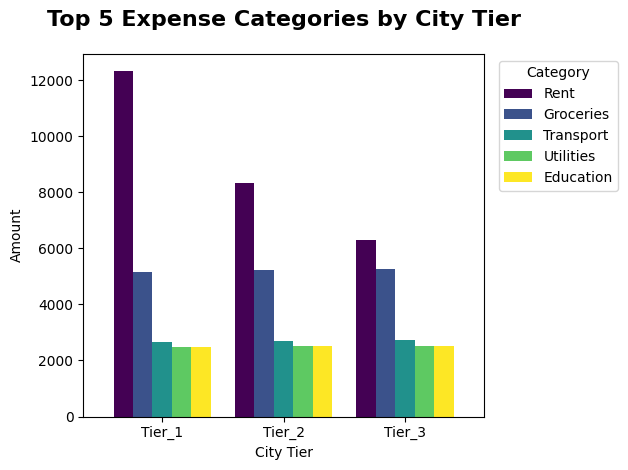

In [20]:
#Top 5 Expenses by City Tier
avg_exp = df[[col for col in df.columns if col in expense_cols]].mean().sort_values(ascending=False)
top5_cats = avg_exp.head(5).index
city_exp = df.groupby('City_Tier', observed=True)[top5_cats].mean()

plt.figure(figsize=(12, 6))
city_exp.plot(kind='bar', cmap='viridis', width=0.8)
plt.title('Top 5 Expense Categories by City Tier', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Amount')
plt.xlabel('City Tier')
plt.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [17]:
#Age group
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '60+'])
#Calulate actual savings
df['Actual_Savings'] = df['Income'] - df['Total_Expenses']
df['Actual_Savings_Rate'] = (df['Actual_Savings'] / df['Income']) * 100

<Figure size 1000x600 with 0 Axes>

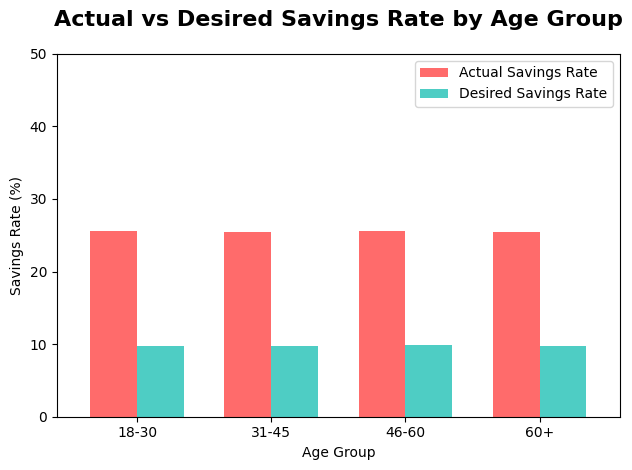

In [18]:

savings_by_age = df.groupby('Age_Group', observed=True)[['Actual_Savings_Rate', 'Desired_Savings_Percentage']].mean()

plt.figure(figsize=(10, 6))
savings_by_age.plot(kind='bar', color=['#ff6b6b', '#4ecdc4'], width=0.7)
plt.title('Actual vs Desired Savings Rate by Age Group', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Savings Rate (%)')
plt.xlabel('Age Group')
plt.legend(['Actual Savings Rate', 'Desired Savings Rate'])
plt.xticks(rotation=0)
plt.ylim(0, 50)
plt.tight_layout()
plt.show()